# Car sales prices
In this project the aim is to build a predictive model according to features related to a car's selling price. The project consists of 3 sections:

Section 1 - Import and analyse raw data.

Section 2 - Clean the data and prep for use in ML algorithm.

Section 3 - Implement the ML algorithm and tune it to functionality.

## Section 1 - Import and analyse raw data
This section focuses on reading the csv file containing the training and testing data as well as analysing and identifying necessary features.

In [514]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [515]:
# read the csv file
raw_data = pd.read_csv("C:\\Users\\heyle\\Downloads\\test-data.csv")

In [516]:
# drop columns that arent of any value to the model
raw_data.drop("Name", axis=1, inplace=True)
raw_data.drop("Location", axis=1, inplace=True)
raw_data.drop("Unnamed: 0", axis=1, inplace=True)

In [517]:
# check total null values in each column
raw_data.isnull().sum()

Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

After taking a close look at the data it can be determined that there is more than 60% missing from the target data. This means that these values are useless to the training of the ML algrithm. All rows that do not contain a New_Price(target data) value will be removed from the table.

In [518]:
# drop nulls
df1 = raw_data.dropna()

By looking at the table below it can be seen that there are now only 182 rows of data that are of value to the training process.

In [519]:
# display data with no nulls
df1

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
30,2014,70000,Diesel,Manual,Second,23.59 kmpl,1364 CC,67.06 bhp,5.0,9.27 Lakh
36,2017,13500,Petrol,Automatic,First,14.84 kmpl,1598 CC,103.52 bhp,5.0,14.95 Lakh
39,2012,66889,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,70.43 Lakh
43,2018,4000,Petrol,Manual,First,15.41 kmpl,1598 CC,103.52 bhp,5.0,11.89 Lakh
...,...,...,...,...,...,...,...,...,...,...
1209,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0,7.06 Lakh
1212,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,8.79 Lakh
1213,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5.0,18.16 Lakh
1216,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,10.57 Lakh


## Section 2 - Clean the data and prep for use in ML algorithm
This section is focused on further cleaning the data and preparing it for use in the training process of the algorithm. This is done by converting non-numerical data into numerical data as well as updating certain values in the table.

In [520]:
# check for value attributes that can be used in a binary format
print(df1.Owner_Type.unique())
print(df1.Transmission.unique())
print(df1.Fuel_Type.unique())

['First' 'Second']
['Manual' 'Automatic']
['Diesel' 'Petrol' 'CNG']


The columns containing values that can be converted into a binary format for identification are converted in the following block of code.

In [521]:
# create dummy variables of the columns
transDummies = pd.get_dummies(df1["Transmission"])# manual = 0
df1 = pd.concat((df1, transDummies), axis=1)
df1 = df1.drop("Transmission", axis=1)
df1 = df1.drop("Manual", axis=1)
df1 = df1.rename(columns={"Automatic":"Transmission"})

ownerDummies = pd.get_dummies(df1["Owner_Type"])# first = 0
df1 = pd.concat((df1, ownerDummies), axis=1)
df1 = df1.drop("Owner_Type", axis=1)
df1 = df1.drop("Second", axis=1)
df1 = df1.rename(columns={"First":"Owner_Type"})

The below table shows the new values representing the Transmission and Owner_Type columns.

In [522]:
df1

,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats,New_Price,Transmission,Owner_Type
2,2017,34000,Diesel,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,0,1
30,2014,70000,Diesel,23.59 kmpl,1364 CC,67.06 bhp,5.0,9.27 Lakh,0,0
36,2017,13500,Petrol,14.84 kmpl,1598 CC,103.52 bhp,5.0,14.95 Lakh,1,1
39,2012,66889,Diesel,22.48 kmpl,1995 CC,190 bhp,5.0,70.43 Lakh,1,1
43,2018,4000,Petrol,15.41 kmpl,1598 CC,103.52 bhp,5.0,11.89 Lakh,0,1
...,...,...,...,...,...,...,...,...,...,...
1209,2016,41413,Diesel,27.28 kmpl,1047 CC,69 bhp,5.0,7.06 Lakh,0,1
1212,2017,39015,Petrol,17.0 kmpl,1497 CC,121.36 bhp,5.0,8.79 Lakh,0,1
1213,2018,6000,Petrol,16.0 kmpl,1368 CC,160 bhp,5.0,18.16 Lakh,0,1
1216,2017,21380,Diesel,24.3 kmpl,1248 CC,88.5 bhp,5.0,10.57 Lakh,0,1


In the following blocks of code the columns containing suffixes in their values are eddited and the suffixes are removed. This enables the data to be used in the model training.

In [523]:
# updating mileage column values
mileageList = []
for line in df1.Mileage:
    line = line[:-4]
    mileageList.append(line)
df1["Mileage"] = mileageList

In [524]:
# updating engine column values
engineList = []
for line in df1.Engine:
    line = line[:-4]
    engineList.append(line)
df1["Engine"] = engineList

In [525]:
# updating powe column values
powerList = []
for line in df1.Power:
    line = line[:-4]
    powerList.append(line)
df1["Power"] = powerList

In [526]:
# updating New_Price(target) column values
targetList = []
for line in df1.New_Price:
    line = line[:-5]
    targetList.append(line)
df1["New_Price"] = targetList

Because the fuel column has more than 2 unique values these can't be converted by using dummy variables. Thus it is converted by making use of conditional statements iterating through the column values.

In [527]:
# updating fuel column values
fuelList = []
for line in df1.Fuel_Type:
    if line == "Diesel":
        fuelList.append(1)
    elif line == "Petrol":
        fuelList.append(2)
    else: fuelList.append(3)
df1["Fuel_Type"] = fuelList

The below table shows the features with their now cleaned values

In [528]:
df1

,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats,New_Price,Transmission,Owner_Type
2,2017,34000,1,13.68,239,147.8,7.0,25.27,0,1
30,2014,70000,1,23.59,136,67.06,5.0,9.27,0,0
36,2017,13500,2,14.84,159,103.52,5.0,14.95,1,1
39,2012,66889,1,22.48,199,190,5.0,70.43,1,1
43,2018,4000,2,15.41,159,103.52,5.0,11.89,0,1
...,...,...,...,...,...,...,...,...,...,...
1209,2016,41413,1,27.28,104,69,5.0,7.06,0,1
1212,2017,39015,2,17.0,149,121.36,5.0,8.79,0,1
1213,2018,6000,2,16.0,136,160,5.0,18.16,0,1
1216,2017,21380,1,24.3,124,88.5,5.0,10.57,0,1


Skewness: 1.971439488265357
Kurtosis: 3.561668986511043


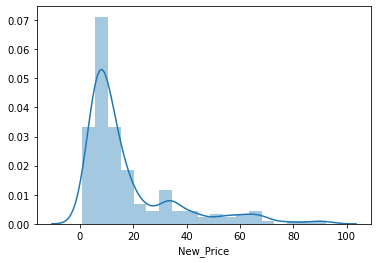

In [529]:
sns.distplot(df1.New_Price)
print("Skewness:",df1["New_Price"].skew())
print("Kurtosis:",df1["New_Price"].kurtosis())

It can be seen that the new price distribution shows a positive skewness(skew > 1). The kurtosis value is low , indicating that there may not be many outliers in the data.

The below heatmap indicates that there are no remaining null values in the table after cleaning

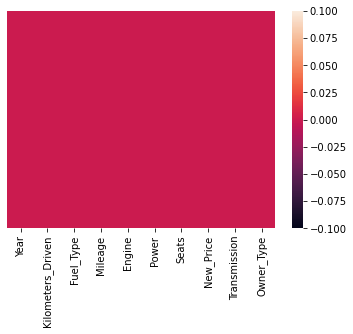

In [530]:
sns.heatmap(df1.isnull(), yticklabels=False)

The below heatmap(correlation matrix) shows the correlation between features in the dataset indicating the relationship between them.

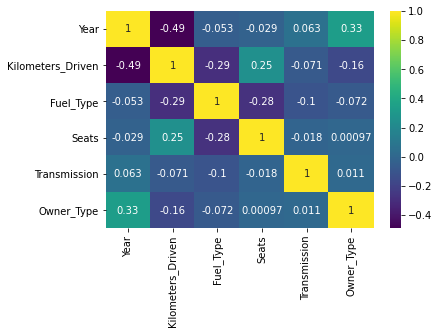

In [531]:
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap="viridis")

The target data is now being seperated from the rest of the data after it has been cleaned

In [532]:
target = df1.New_Price
target

2       25.27
30       9.27
36      14.95
39      70.43
43      11.89
        ...  
1209     7.06
1212     8.79
1213    18.16
1216    10.57
1217     7.08
Name: New_Price, Length: 182, dtype: object

The target column is now dropped from the table to complete the seperation process.

In [533]:
df1 = df1.drop("New_Price", axis=1)

The table shows that the target values are no longer part of the dataset.

In [534]:
df1

,Year,Kilometers_Driven,Fuel_Type,Mileage,Engine,Power,Seats,Transmission,Owner_Type
2,2017,34000,1,13.68,239,147.8,7.0,0,1
30,2014,70000,1,23.59,136,67.06,5.0,0,0
36,2017,13500,2,14.84,159,103.52,5.0,1,1
39,2012,66889,1,22.48,199,190,5.0,1,1
43,2018,4000,2,15.41,159,103.52,5.0,0,1
...,...,...,...,...,...,...,...,...,...
1209,2016,41413,1,27.28,104,69,5.0,0,1
1212,2017,39015,2,17.0,149,121.36,5.0,0,1
1213,2018,6000,2,16.0,136,160,5.0,0,1
1216,2017,21380,1,24.3,124,88.5,5.0,0,1


In [535]:
# fix value err in column
df1["Mileage"] = df1["Mileage"].str.replace(" k","")

The data that has been seperated is now converted into numpy arrays for use in the training process of the ML algorithm. The target array is flattened as well to be fit to the model later on.

In [536]:
x = df1.to_numpy()
y1 = target.to_numpy()
y = y1.flatten()
# shape indicates the array is in the correct 1-dimension
y.shape

(182,)

## Section 3 - Implement the ML algorithm and tune it to functionality
This section consists of the selection process for the best suited ML algorithm as well as the implemenation , training and testing of the selected model.

In [537]:
# import from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

The data is being split into training and testing data with a 80:20 train test ratio.

In [538]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

The process of model selection takes place in the below blocks of code.
In the following block of code a list is used to store the candidate algorithms whilst a for loop keeps track of each models performance. The results are displayed in a pandas dataframe for analysis.

In [539]:
modelScores = []

algList = [
    ["Linear_Regression", LinearRegression()],
    ["Logistic_Regression", LogisticRegression()],
    
    ["Random_Forest_Regressor", RandomForestRegressor()],
    ["Gradient_Boosting_regression", GradientBoostingRegressor()]
]
for reg in algList:
    modelName = reg[0]
    model = reg[1]
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_test)
    trainScore = model.score(x_train, y_train)
    testScore = model.score(x_test, y_test)
    modelScores.append(["Model",modelName, "Training score",trainScore, "Testing score",testScore])
modelScores
modelFrame = pd.DataFrame(data=modelScores)
modelFrame

C:\Users\heyle\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0,1,2,3,4,5
0,Model,Linear_Regression,Training score,0.583560,Testing score,0.301385
1,Model,Logistic_Regression,Training score,0.068966,Testing score,0.000000
2,Model,Random_Forest_Regressor,Training score,0.948843,Testing score,0.790371
3,Model,Gradient_Boosting_regression,Training score,0.996034,Testing score,0.944463


The best performing model is now fitted to the the data for training and prediction

In [550]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [551]:
print(model.predict(x_test))
print(y_test)
print(model.score(x_test, y_test))

[ 5.87414697  9.9492283   4.35681055 34.3795944  38.84907504  5.80233639
 24.46083575 59.2267634  35.26803162 25.2525576   7.07033489 41.82409781
  7.61128373  5.56227371  8.74606075  6.41942967  7.39476968 66.767695
 32.44365061 10.63698184  2.31570359 13.64207284 10.75170192  6.75731711
  5.98086752  8.16054924  4.14445187  8.68870419  6.7119564  13.00136321
  4.63039917 16.83024963  6.65247958 10.8851048   6.41942967  7.71712113
  4.3387506 ]
['5.01' '8.92' '5.78' '40.62' '43.65' '6.78' '20.74' '49.12' '34.1'
 '25.04' '8.85' '29.9' '8.28' '3.99' '10.55' '7.87' '9.94' '67.87' '26.14'
 '12.46' '1.' '9.4' '9.26' '6.38' '4.56' '7.21' '4.5' '7.67' '6.44'
 '15.59' '4.59' '15.57' '9.45' '10.51' '7.43' '9.51' '3.95']
0.9454875123907965


## Conclusion
It can be concluded that the best performing algorithm for predicting a cars selling value considering various features that impact the value is the GradientBoostingRegressor algorithm with a 94.5% accuray rate.